In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Simulated signal

In [2]:
import signalgenerator as sg

In [3]:
f1 = 4.65
f2 = 5.25
a1 = 128
a2 = 153
dT = 0.01
data_points = 1000
timesteps = [i*dT for i in range(data_points)]

simulated_signal, frequencies = sg.complexSignal(f1, f2, a1, a2, data_points = data_points)
tremor1, tremor2, noise = sg.complexSignal(f1, f2, a1, a2, data_points = data_points, separate_signals = True)

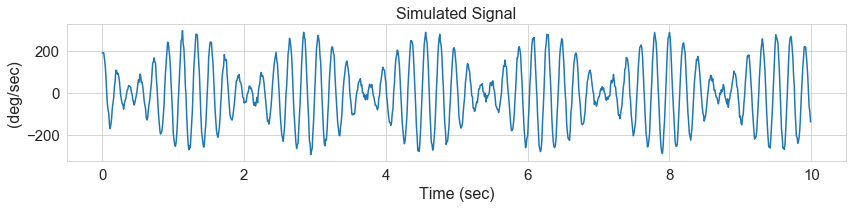

In [4]:
# plot signal
plt.figure(figsize=(12, 3))
plt.title("Simulated Signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.tight_layout()

plt.show()

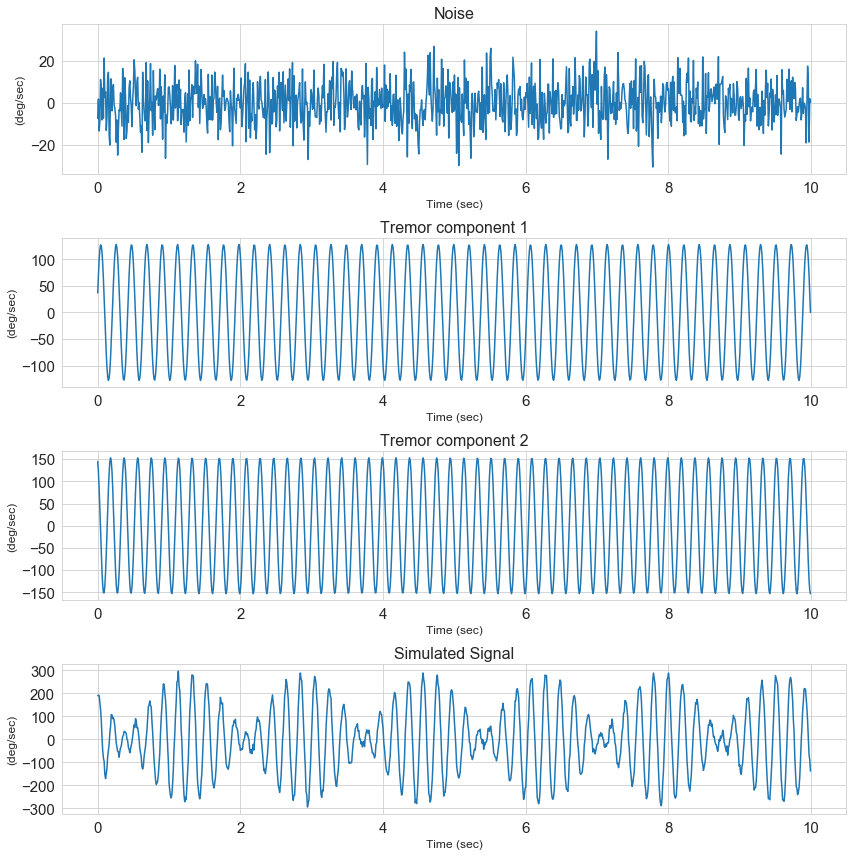

In [5]:
# plot signals

plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.title("Noise", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, noise)

plt.subplot(412)
plt.title("Tremor component 1", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, tremor1)

plt.subplot(413)
plt.title("Tremor component 2", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, tremor2)

plt.subplot(414)
plt.title("Simulated Signal", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.tight_layout()

plt.show()

# Real signal

The real dataset was downloaded from the website of [Motus Bioengineering Inc., Benicia, CA](https://www.motusbioengineering.com/sample-test-results-2.htm). The data was recorded with a biaxial gyroscope developed by Motus Bioengineering Inc., with a sampling rate of 100 Hz. The sensor responds to angular velocity and is set up to measure flexion-extension or the pronation-supination axis of the wrist. The recordings are of 1 DOF at a time, when both flexion-extension and the pronation-supination have been recorded simultaneously the recordings come in two separate files. This dataset has been used by several researchers to test the performance of their pathological tremor estimators: [WAKE](https://arxiv.org/abs/1711.06815), [ASBMFLC](https://www.sciencedirect.com/science/article/abs/pii/S1746809413001377), [RKE-BMFLC](https://ieeexplore.ieee.org/document/8308681), [EstimationSFFT](https://journals.sagepub.com/doi/abs/10.1177/1687814016654872), [AMLOC](https://www.sciencedirect.com/science/article/abs/pii/S1746809416000070). 

Here we only load parts of the dataset, the complete dataset and more information about it can be found [here](https://www.motusbioengineering.com/sample-test-results-2.htm). All the patients in this dataset suffered from PD.

In [6]:
import filereader as fr

real_signal = fr.readFromFileChFig1()[0]

In [7]:
def plot_real_signal(signal):
    timesteps = [i*0.01 for i in range(len(signal))]
    # plot signal
    plt.figure(figsize=(12, 3))
    plt.title("Real Signal", size = 16)
    plt.ylabel("(deg/sec)", size = 16)
    plt.xlabel("Time (sec)", size = 16)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.plot(timesteps, signal)
    plt.tight_layout()
    plt.show()

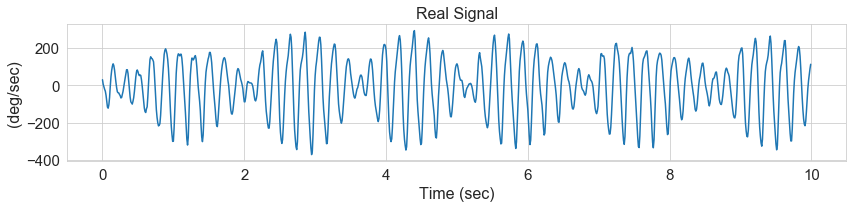

In [8]:
plot_real_signal(real_signal)

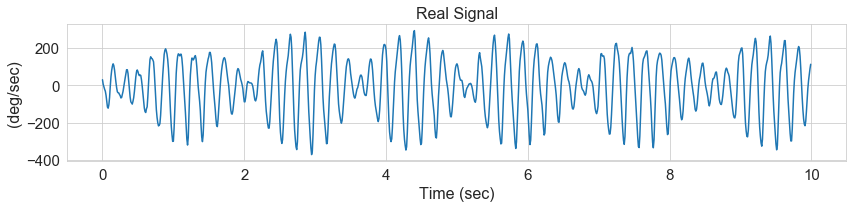

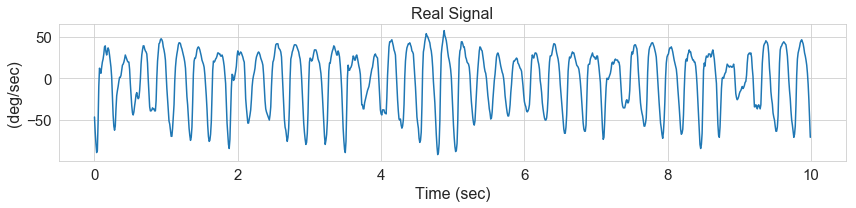

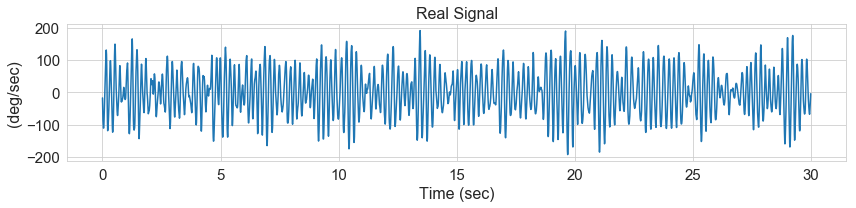

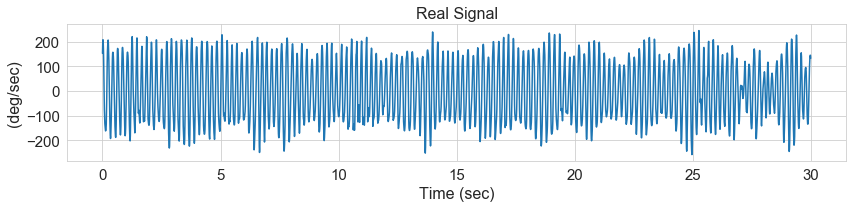

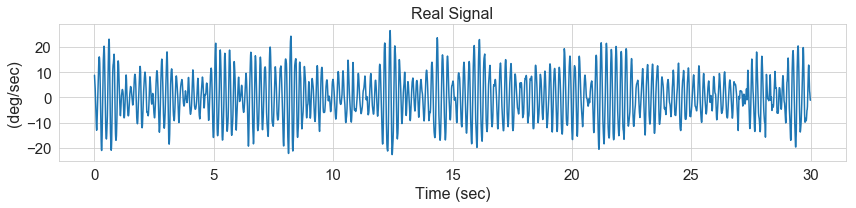

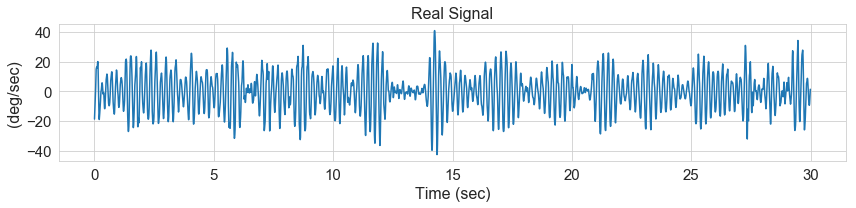

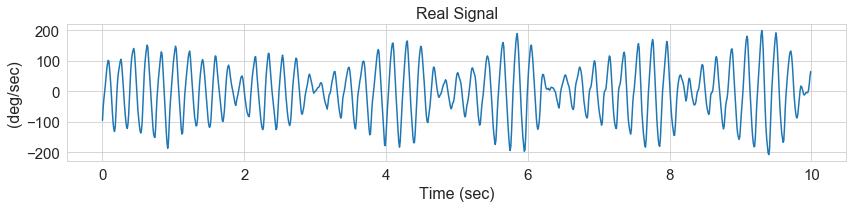

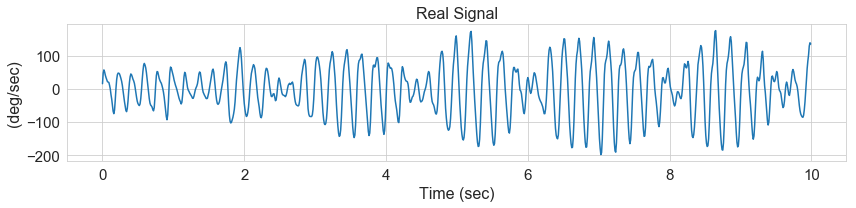

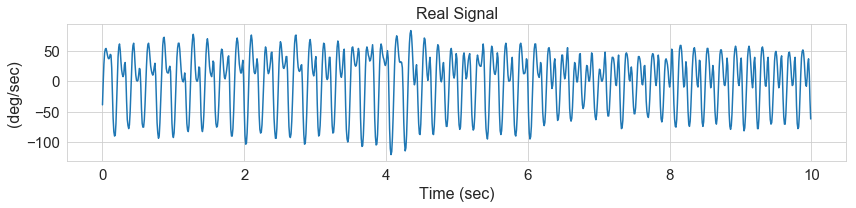

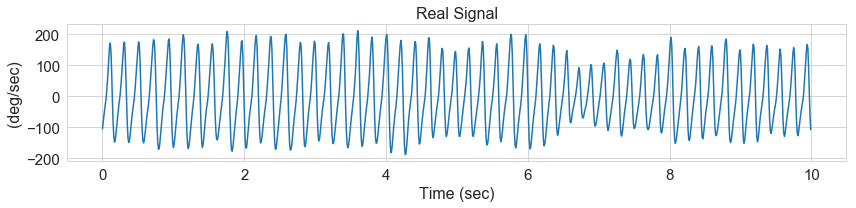

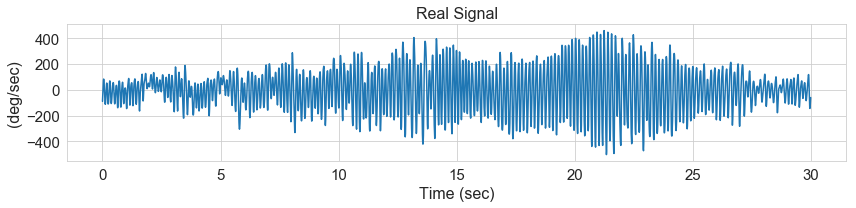

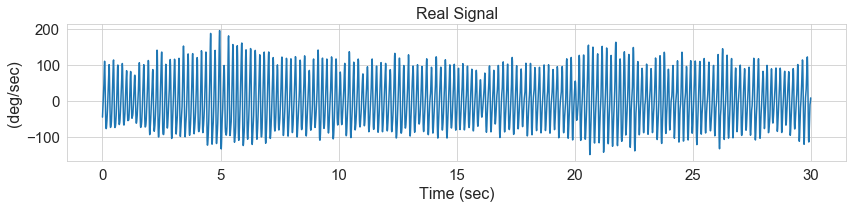

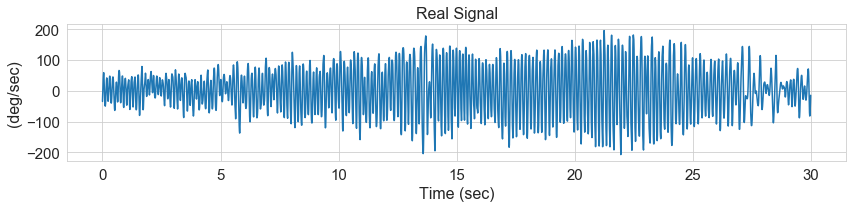

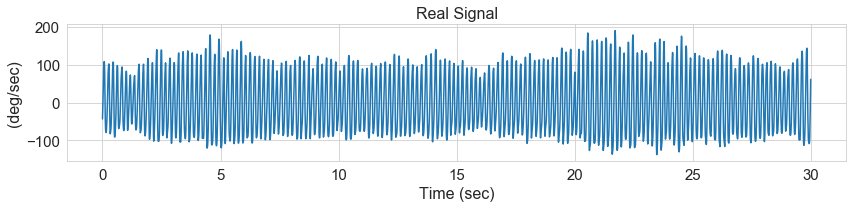

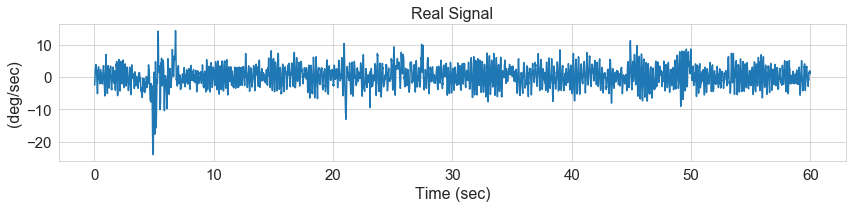

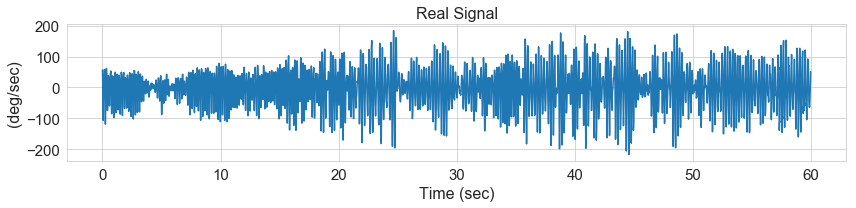

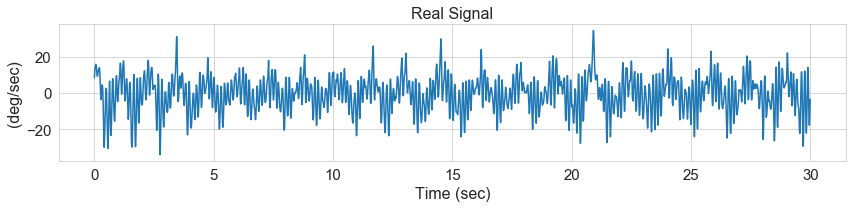

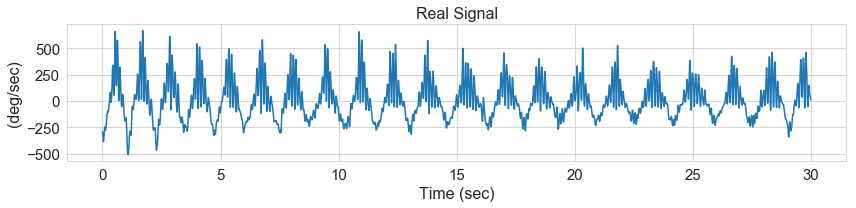

In [9]:
real_signals = fr.readFromAllFiles()

for s in real_signals:
    plot_real_signal(s)